In [180]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# 2.1 Review ODEs

## Integrating factor
$\frac{{\rm d}x(t)}{{\rm d}t} + P(t)x(t) = Q(t)$

Find $J(t)$ such that $\frac{{\rm d}J(t)x(t)}{{\rm d}t} = J(t)\frac{{\rm d}x(t)}{{\rm d}t} + x(t)\frac{{\rm d}J(t)}{{\rm d}t} = J(t)Q(t)$

Then set $\frac{{\rm d}J(t)}{{\rm d}t} = JP$, we got $J(t) = \exp(\int P(t){\rm d}t)$

solve $\frac{{\rm d}J(t)x(t)}{{\rm d}t} = J(t)Q(t)$, we could get the solution

In [94]:
## e.g.1
V, v, m, t = sym.symbols('V v m t', positive=True)
s = sym.symbols('s', cls=sym.Function)
deqn1 = sym.Eq(s(t).diff(t) + v/V*s(t), m/V)
deqn1

Eq(Derivative(s(t), t) + v*s(t)/V, m/V)

In [95]:
soln1 = sym.dsolve(deqn1, s(t), ics={s(0):0})
soln1

Eq(s(t), (m + exp(v*((log(m) + I*pi)/v - t/V)))/v)

In [96]:
sym.limit(soln1.args[1], t, sym.oo)

m/v

## Separable form
$\frac{{\rm d}x}{{\rm d}t} = f(t, x)$

If $f(t, x) = g(t)h(x)$, then $\frac{1}{h(x)}\frac{{\rm d}x}{{\rm d}t} = g(t)$

Integration with respect to $t$ gives $\int \frac{1}{h(x)}\frac{{\rm d}x}{{\rm d}t}{\rm d}t = \int g(t) {\rm d}t$

Finally, $\int \frac{1}{h(x)}{\rm d}x = \int g(t) {\rm d}t$

If both integrals can be evaluated, we can get an analytic solution

In [32]:
## e.g.2
t = sym.symbols('t')
x = sym.symbols('x', cls=sym.Function)
deqn2 = sym.Eq(x(t).diff(t), -t/x(t))
deqn2

Eq(Derivative(x(t), t), -t/x(t))

In [55]:
soln2 = sym.dsolve(deqn2, x(t))
soln2

[Eq(x(t), -sqrt(C1 - t**2)), Eq(x(t), sqrt(C1 - t**2))]

In [57]:
## e.g.3
t = sym.symbols('t')
x = sym.symbols('x', cls=sym.Function)
deqn3 = sym.Eq(x(t).diff(t), t/(x(t)**2))
deqn3

Eq(Derivative(x(t), t), t/x(t)**2)

In [58]:
soln3 = sym.dsolve(deqn3, x(t))
soln3

[Eq(x(t), (C1 + 3*t**2/2)**(1/3)),
 Eq(x(t), (-1 - sqrt(3)*I)*(C1 + 3*t**2/2)**(1/3)/2),
 Eq(x(t), (-1 + sqrt(3)*I)*(C1 + 3*t**2/2)**(1/3)/2)]

In [140]:
## supplyment ODE example
f = sym.symbols('f', cls=sym.Function)
x = sym.symbols('x')
eq = sym.Eq(f(x).diff(x,1)+f(x)+f(x)**2, 0)
eq

Eq(f(x)**2 + f(x) + Derivative(f(x), x), 0)

In [141]:
so = sym.dsolve(eq, f(x), ics={f(0):1})
so

Eq(f(x), -1/(2*(1/2 - exp(x))))

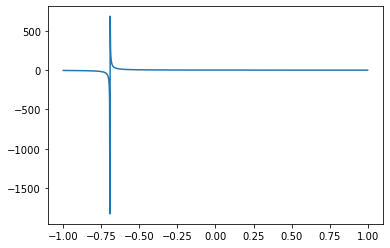

In [145]:
a = np.linspace(-1, 1, 1000)
y = [ so.subs(x, i).evalf().args[1] for i in a]

plt.plot(a, y)
plt.show()

In [151]:
## e.g.4 logistic equation
t, b, d = sym.symbols('t beta delta')
P = sym.symbols('P', cls=sym.Function)
deqn4 = sym.Eq(P(t).diff(t), P(t)*(b-d*P(t)))
deqn4


Eq(Derivative(P(t), t), (beta - delta*P(t))*P(t))

In [158]:
soln4 = sym.dsolve(deqn4, P(t), ics={P(0):800})
so = soln4.subs({d:0.001, b:1})
so

Eq(P(t), 1000.0/(1 + 0.25*exp(-t)))

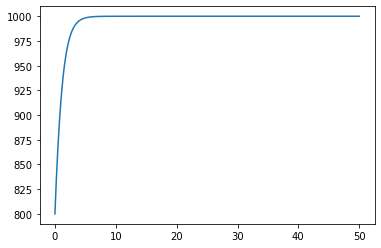

In [160]:
x = np.linspace(0, 50, 1000)
y = [ so.subs(t, i).args[1]  for i in x]
plt.plot(x, y)
plt.show()

## Exact form
$M(t, x) + N(t, x)\frac{{\rm d}x}{{\rm d}t} = 0$

If there exists a function $F(t, x)$ such that $\begin{cases} \frac{\partial F}{\partial t} &= M(t, x) \\ \frac{\partial F}{\partial x} &= N(t, x) \end{cases}$, we say it to be __exact__

such a function $F(t, x)$ exists as long as $\frac{\partial M}{\partial x} = \frac{\partial N}{\partial t}$, and the solution is $F(t, x) = C$

In [161]:
## e.g.5
t = sym.symbols('t')
x = sym.symbols('x', cls=sym.Function)
deqn5 = sym.Eq(x(t).diff(t), (9-12*t-5*x(t))/(5*t+2*x(t)-4) )
deqn5

Eq(Derivative(x(t), t), (-12*t - 5*x(t) + 9)/(5*t + 2*x(t) - 4))

In [162]:
soln5 = sym.dsolve(deqn5, x(t))
soln5

[Eq(x(t), -5*t/2 - sqrt(C1 + t**2 - 4*t)/2 + 2),
 Eq(x(t), -5*t/2 + sqrt(C1 + t**2 - 4*t)/2 + 2)]

## Homogeneous DEs
$\frac{{\rm d}x}{{\rm d}t} = f(\frac{x}{t})$

let $v = x/t$, then $v + t\frac{dx}{dt} = f(v) \Rightarrow \frac{dx}{dt} = \frac{f(v) - v}{t}$, which is separable.

In [165]:
## e.g.6
t = sym.symbols('t')
x = sym.symbols('x', cls=sym.Function)
deqn6 = sym.Eq(x(t).diff(t), (t-x(t))/(t+x(t)))
deqn6

Eq(Derivative(x(t), t), (t - x(t))/(t + x(t)))

In [166]:
soln6 = sym.dsolve(deqn6, x(t))
soln6

[Eq(x(t), -t - sqrt(C1 + 2*t**2)), Eq(x(t), -t + sqrt(C1 + 2*t**2))]

## Numerical solutions
seek the solution of the form $x(t) = \sum\limits_{n=0}^\infty a_n (t-t_0)^n$

In [167]:
## e.g.7
t = sym.symbols('t')
x = sym.symbols('x', cls=sym.Function)
deqn7 = sym.Eq(x(t).diff(t) + t*x(t), t**3)
deqn7

Eq(t*x(t) + Derivative(x(t), t), t**3)

In [168]:
soln7 = sym.dsolve(deqn7, x(t), hint='1st_power_series', n=8, ics={x(0):1})
soln7

Eq(x(t), 1 - t**2/2 + 3*t**4/8 - t**6/16 + O(t**8))

In [170]:
## e.g.8
t = sym.symbols('t')
x = sym.symbols('x', cls=sym.Function)
deqn8 = sym.Eq(x(t).diff(t, 2)+2*t**2*x(t).diff(t)+x(t), 0)
deqn8

Eq(2*t**2*Derivative(x(t), t) + x(t) + Derivative(x(t), (t, 2)), 0)

In [178]:
soln8 = sym.dsolve(deqn8, x(t), hint='2nd_power_series_ordinary', n=6)
soln8

Eq(x(t), C2*(t**4/24 - t**2/2 + 1) + C1*t*(-t**3/6 - t**2/6 + 1) + O(t**6))

In [183]:
def ODE2(X, t):
    x, y = X
    dxdt = y
    dydt = x - t**2*y
    return [dxdt, dydt]

X0 = [1, 0] # initial condition
t = np.linspace(0, 10, 1000)
sol = odeint(ODE2, X0, t)
x = sol[:, 0]
y = sol[:, 1]

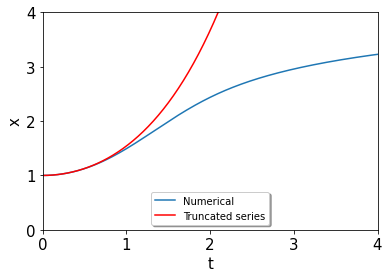

In [186]:
fig, ax = plt.subplots()
ax.plot(t,x,label='Numerical')
ax.plot(t, 1 + t**2/2 + t**4/24, 'r-', label='Truncated series')
plt.xlabel("t", fontsize=15)
plt.ylabel("x", fontsize=15)
plt.tick_params(labelsize=15)
plt.xlim(0, 4)
plt.ylim(0, 4)
ax.legend(loc='lower center', shadow=True)
plt.show()